In [1]:
%load_ext autoreload
%autoreload 2

# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from utils import feature_normalize

# Load and Visualize Example Datasetfeature_normalize

In [3]:
data = loadmat('data/ex7data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
X = data['X']
X.shape

(50, 2)

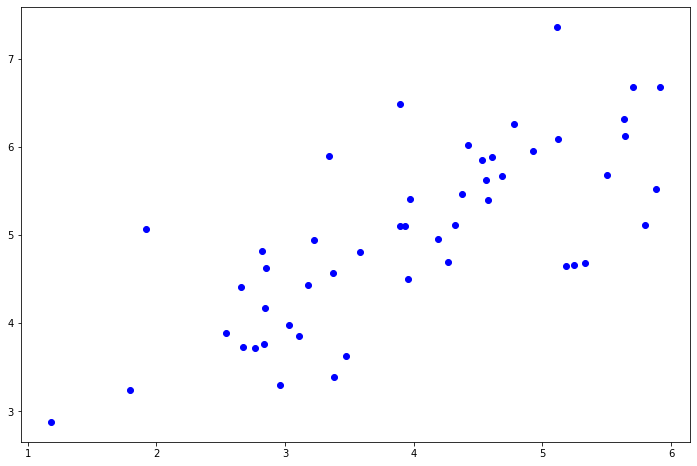

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(X[:, 0], X[:, 1], 'bo')

# Principal Component Analysis

In [6]:
from utils import pca

In [7]:
X_norm, mu, sigma = feature_normalize(X)

In [8]:
U, S = pca(X_norm, 2)

In [9]:
S

array([1.73553038, 0.26446962])

In [10]:
U

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [11]:
from utils import drawline

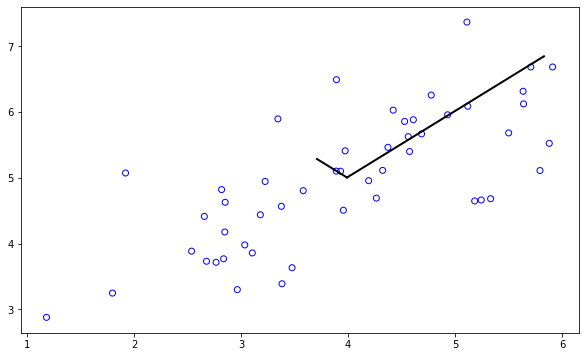

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], facecolors='none', color='b')
drawline(mu, mu + 1.5 * S[0] * U[:, 0].T)
drawline(mu, mu + 1.5 * S[1] * U[:, 1].T)

# Dimension Reduction

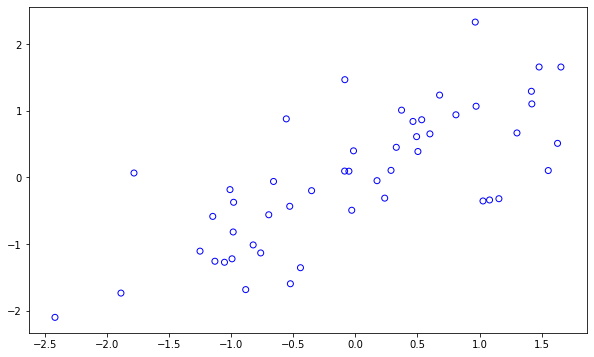

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], facecolors='none', color='b')

In [14]:
from utils import project_data

In [15]:
K = 1
Z = project_data(X_norm, U, K)

In [16]:
Z.shape

(50, 1)

In [17]:
from utils import recover_data

In [18]:
X_rec = recover_data(Z, U, K)

In [19]:
X_rec.shape

(50, 2)

In [20]:
X_rec[0,1]

-1.058052792215478

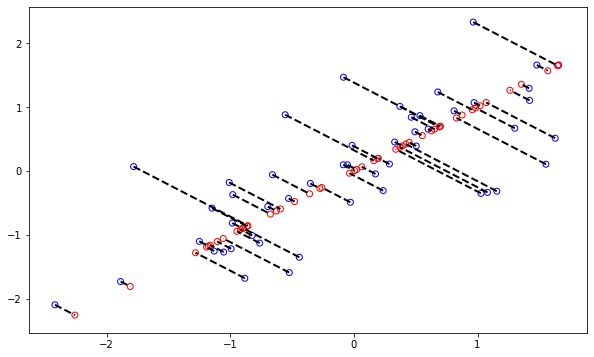

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], facecolors='none', color='b')
plt.scatter(X_rec[:, 0], X_rec[:, 1], facecolors='none', color='r')
for i in range(X_norm.shape[0]):
    drawline(X_norm[i, :], X_rec[i, :], color_type='k--')

# Loading and Visualizing Face Data

In [22]:
# Load Face dataset
faces = loadmat('data/ex7faces.mat')
faces.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [23]:
from utils import display_data

In [24]:
X = faces['X']
X.shape

(5000, 1024)

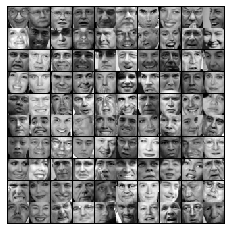

In [25]:
display_data(X[0:100, :])

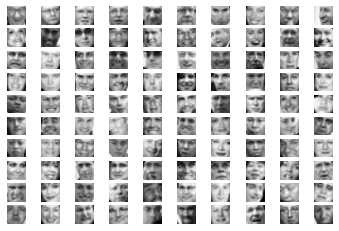

In [26]:
for i, da in enumerate(X[0:100, :]):
    sp = plt.subplot(10, 10, i+1, facecolor='red')
    sp.axis('Off')
    data_points_ = np.reshape(da, (32,32), order='F')
    plt.imshow(data_points_, cmap='gray', interpolation = 'bicubic')

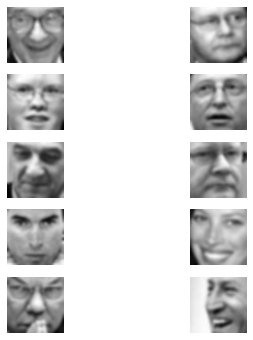

In [27]:
fig = plt.figure(figsize=(6, 6))
for i, da in enumerate(X[0:10, :]):
    # ax = fig.add_subplot(1,1,1)
    ax = fig.add_subplot(5, 2, i+1, facecolor='red')
    # sp = plt.subplot(10, 10, i+1, facecolor='red')
    # sp.axis('Off')
    ax.axis('Off')
    data_points_ = np.reshape(da, (32,32), order='F')
    # plt.imshow(data_points_, cmap='gray', interpolation = 'bicubic')
    ax.imshow(data_points_, cmap='gray', interpolation = 'bicubic')

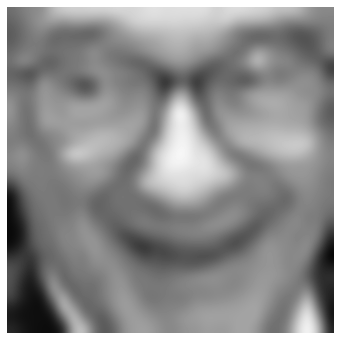

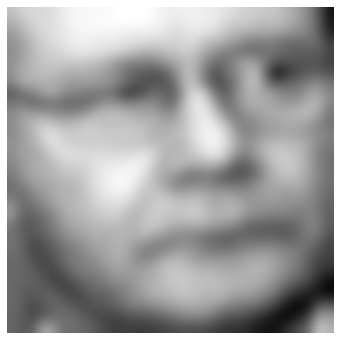

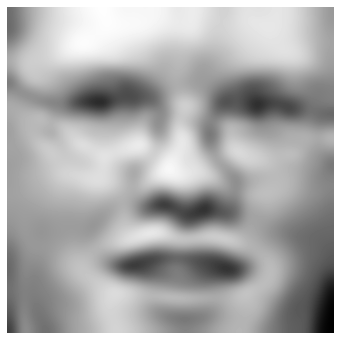

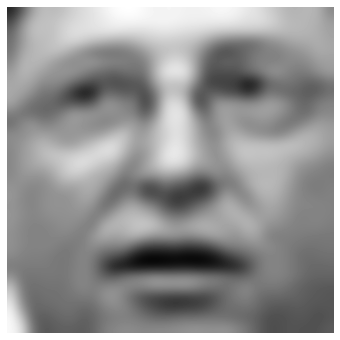

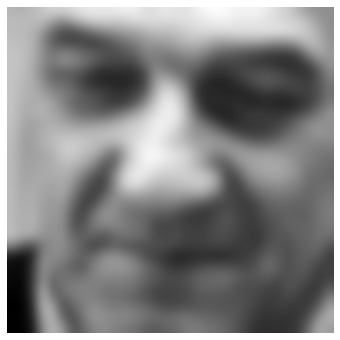

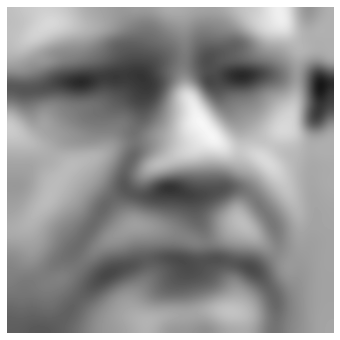

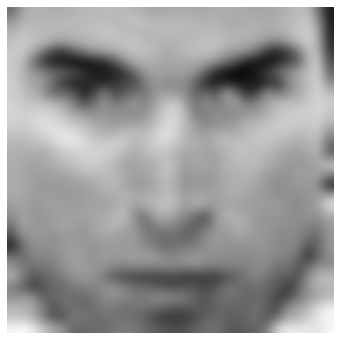

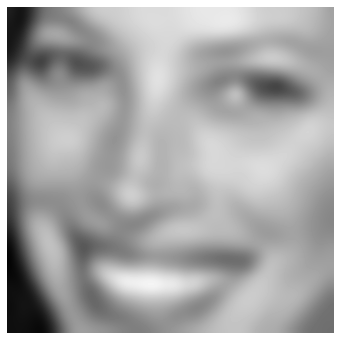

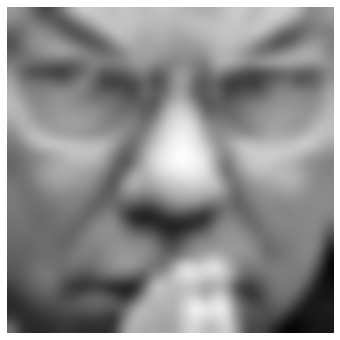

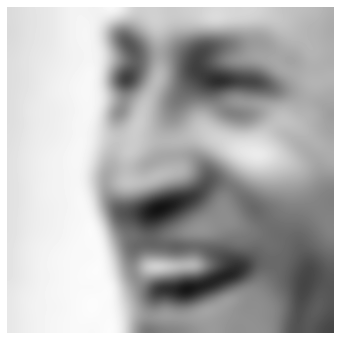

In [28]:
for i, da in enumerate(X[0:10, :]):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1,1,1)
    ax.axis('Off')
    data_points_ = np.reshape(da, (32,32), order='F')
    ax.imshow(data_points_, cmap='gray', interpolation = 'bicubic')

# PCA on Face Data: Eigenfaces

In [29]:
X_norm, mu, sigma = feature_normalize(X)

In [30]:
# Run PCA
n_components = X_norm.shape[1]
U, S = pca(X_norm, n_components)

In [31]:
data_points = U[:, 0:36]
print(data_points.shape)
data_points = data_points.T
print(data_points.shape)

(1024, 36)
(36, 1024)


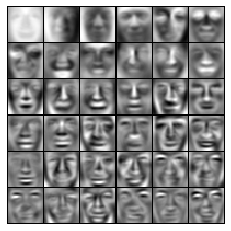

In [32]:
display_data(U[:, 0:36].T)

# Dimension Reduction for Faces

In [33]:
K = 100
Z = project_data(X_norm, U, K)

In [34]:
Z.shape

(5000, 100)

# Visualization of Faces after PCA Dimension Reduction

In [35]:
K = 100
X_rec = recover_data(Z, U, K)

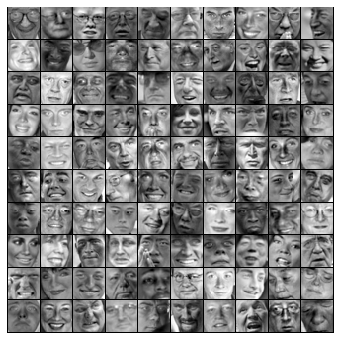

In [36]:
fig = plt.figure(figsize=(10, 6))
display_data(X_norm[0:100, :])

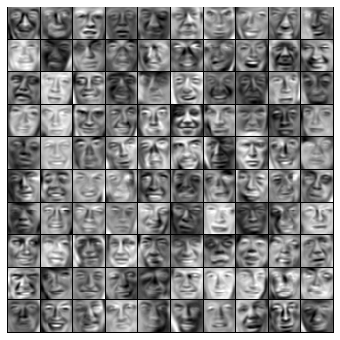

In [37]:
fig = plt.figure(figsize=(10, 6))
display_data(X_rec[0:100, :])

# PCA for Visualization

In [45]:
img = plt.imread('data/bird_small.png')

img = img / 255.  # Divide by 255 so that all values are in the range 0 - 1

row, col, height = img.shape

In [46]:
X = np.reshape(img, (row*col, height), order='F')
X.shape

(16384, 3)

In [47]:
sel = np.floor(np.random.rand(1000, 1) * X.shape[0]) + 1
sel.shape

(1000, 1)

In [48]:
# Need to run kmeans first

In [ ]:
R = np.linspace(0, K, K+1)
norm = plt.Normalize(0, K+1)
palete = plt.cm.hsv(norm(R))
colors = palete[idx[sel], :]

plt.scatter(X[:, 0], X[:, 1], facecolors='none', color=colors)

In [49]:
X_norm, mu, sigma = feature_normalize(X)

In [51]:
U, S = pca(X_norm, n_components=2)

In [52]:
Z = project_data(X_norm, U, 2)

In [ ]:
plot_data_points(Z[sel, :], idx[sel], K)